In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
datasets = pd.read_csv("dataset/weight-height.csv")
datasets.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
x_data = datasets.iloc[:, 1:3]
x_data["Weight"] = x_data["Weight"] / 2.20462
y_data = datasets["Gender"]
print(x_data.head(), "\n\n")
print(y_data.head())

      Height      Weight
0  73.847017  109.721205
1  68.781904   73.622879
2  74.110105   96.497744
3  71.730978   99.809704
4  69.881796   93.598806 


0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object


In [4]:
x_data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,73.228201
std,3.847528,14.564160
min,54.263133,29.347519
25%,63.505620,61.606105
50%,66.318070,73.125041
75%,69.174262,84.898769
max,78.998742,122.465413


In [5]:
y_data.describe()

count      10000
unique         2
top       Female
freq        5000
Name: Gender, dtype: object

In [6]:
print(x_data[y_data=="Female"]["Height"].mean(), x_data[y_data=="Female"]["Weight"].mean())
print(x_data[y_data=="Male"]["Height"].mean(), x_data[y_data=="Male"]["Weight"].mean())

63.70877360342507 61.625174863454184
69.02634590621741 84.83122744880896


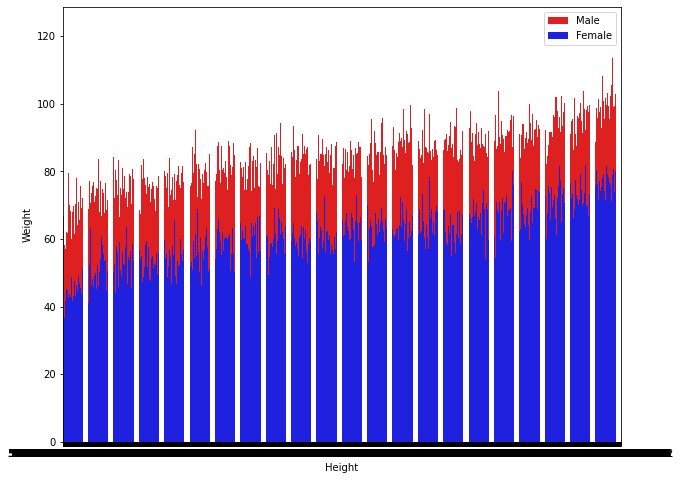

In [7]:
plt.figure(figsize=(10, 8))
sns.barplot(x_data[y_data=="Male"]["Height"], x_data[y_data=="Male"]["Weight"], color='red', label="Male")
sns.barplot(x_data[y_data=="Female"]["Height"], x_data[y_data=="Female"]["Weight"], color="blue", label="Female")
plt.legend()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=156)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 2) (8000,)
(2000, 2) (2000,)


In [9]:
rf_model = RandomForestClassifier(random_state=156)
rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred), 4)
print('accuracy score:', accuracy)

accuracy score: 0.9015


In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators" : [100],
    "max_depth": [6, 8, 10, 12],
    "min_samples_leaf": [8, 12, 18],
    "min_samples_split": [8, 16, 20]
}

rf_model = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_model, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print("best RandomForestClassifier accuracy score:", np.round(grid_cv.best_score_, 4))

best RandomForestClassifier accuracy score: 0.9206


In [24]:
rf_accuracy = np.round(accuracy_score(y_test, grid_cv.best_estimator_.predict(X_test)), 4)

In [25]:
print("RandomForestClassifier accuracy score:", rf_accuracy)

RandomForestClassifier accuracy score: 0.9115


In [12]:
input_height = float(input("height:")[1:])
input_weight = float(input("weight(kg):"))


pred = grid_cv.best_estimator_.predict(np.array([input_height, input_weight]).reshape(1, -1))
print(pred)

height:178
weight(kg):78
['Male']


In [17]:
import joblib

joblib.dump(grid_cv.best_estimator_, 'height_classifier.pkl')

['height_classifier.pkl']

### - RandomForst 와 GBM, 그리고 XGBoost 의 성능 비교

### - GBM

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=156)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = np.round(accuracy_score(y_test, gb_pred), 4)

print("GBM accuracy score:", gb_accuracy)

GBM accuracy score: 0.911


In [21]:
params = {
    "n_estimators": [100, 500],
    "learning_rate": [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_model, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print("best GBM accuracy score:", np.round(grid_cv.best_score_, 4))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.4s finished


best GBM accuracy score: 0.9201


### - XGBoost

In [26]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = np.round(accuracy_score(y_test, xgb_pred), 4)
print("xgb accuracy score:", xgb_accuracy)

[19:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb accuracy score: 0.91


### - 성능 비교

In [28]:
print("RandomForstClassifier accuracy score:", rf_accuracy)
print("GBM accuracy score:", gb_accuracy)
print("XGBoost accuracy score:", xgb_accuracy)
print("셋 다 비슷함.")

RandomForstClassifier accuracy score: 0.9115
GBM accuracy score: 0.911
XGBoost accuracy score: 0.91
셋 다 비슷함.
